Afin de déterminer la source des différences de valorisations entre des entreprises françaises et américaines, on peut regarder l'impact de résultats internes à l'entreprises et de critères relatifs à l'analyse par le marché 

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
chemin_fichier = '../Nettoyage des données/df_Eurostoxx_clean.csv'
df_eurostoxx_clean = pd.read_csv(chemin_fichier)
df_eurostoxx_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,1COV,1COV.DE,Covestro AG,Eurostoxx,2021,2021-12-31,Basic Materials,Specialty Chemicals,Germany,1.043,...,15.903000,7.696000,15.571000,2.528000,1.30,0.225463,10.161605,32.848233,15.531661,NaN
1,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2021,2021-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.909659,5.219201,7.063730,0.102285,0.05,0.035485,9.464304,1.959783,2.380952,NaN
2,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2022,2022-12-31,Communication Services,Telecom Services,Germany,0.410,...,3.963691,5.579841,7.257085,0.102669,0.05,0.016834,9.267322,1.839999,2.403846,-0.952381
3,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2023,2023-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.096701,5.887074,7.740306,0.188507,0.05,0.024756,7.687893,3.202049,2.793296,-13.942308
4,1U1,1U1.DE,1&1 DrillischAktiengesellschaft,Eurostoxx,2024,2024-12-31,Communication Services,Telecom Services,Germany,0.410,...,4.064254,6.093970,8.130073,0.412959,0.05,0.013964,5.235007,6.776518,4.132231,-32.402235


In [8]:
chemin_fichier = '../Nettoyage des données/df_SP500_clean.csv'
df_sp500_clean = pd.read_csv(chemin_fichier)
df_sp500_clean.head()   

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Croissance de l'EPS (en %)
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,NaN
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,5.276382
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,0.715990
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,5.213270
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,NaN


In [9]:
print(f"Nombre d'observations S&P 500 : {len(df_sp500_clean)}")
print(f"Nombre d'observations Eurostoxx : {len(df_eurostoxx_clean)}")

Nombre d'observations S&P 500 : 1501
Nombre d'observations Eurostoxx : 1207


Il convient de créer un nouveau data frame contenant toutes les informations pour mener la régressions linéaires

In [10]:
df_eurostoxx_clean.isna().sum()

Ticker                          0
YahooTicker                     0
Nom                             0
Zone                            0
AnneeFiscale                    0
DateRapport                     0
Sector                          0
Industry                        0
Country                         0
Beta                            0
MarketCapitalizationBN          0
SharesOutstandingMn             0
PER_calcule                     0
ROE_calcule                     0
ROA_calcule                     0
DebtToEquity_calcule            0
EPS                             0
EOD_Close_Price                 0
NetIncomeBN                     0
TotalRevenueBN                  0
TotalEquityBN                   0
TotalAssetsBN                   0
TotalDebtBN                     0
Dividendes_Annuels              0
Annual_Volume_Traded_BN         0
%MargeNette                     0
%Gearing                        0
%PayOut                         0
Croissance de l'EPS (en %)    360
dtype: int64

In [11]:
df_analyse = pd.concat([df_sp500_clean,df_eurostoxx_clean], ignore_index = True)
df_analyse = df_analyse.drop("Croissance de l'EPS (en %)", axis = 1)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,NetIncomeBN,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.210,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.254,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.240,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,1.289,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,99.803,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748


In [12]:
print(f"Nombre d'observations S&P 500 et STX : {len(df_analyse)}")

Nombre d'observations S&P 500 et STX : 2708


In [13]:
df_analyse.isna().sum()

Ticker                     0
YahooTicker                0
Nom                        0
Zone                       0
AnneeFiscale               0
DateRapport                0
Sector                     0
Industry                   0
Country                    0
Beta                       0
MarketCapitalizationBN     0
SharesOutstandingMn        0
PER_calcule                0
ROE_calcule                0
ROA_calcule                0
DebtToEquity_calcule       0
EPS                        0
EOD_Close_Price            0
NetIncomeBN                0
TotalRevenueBN             0
TotalEquityBN              0
TotalAssetsBN              0
TotalDebtBN                0
Dividendes_Annuels         0
Annual_Volume_Traded_BN    0
%MargeNette                0
%Gearing                   0
%PayOut                    0
dtype: int64

Les informations des deux data frame ont bien été récuperées dans df_analyse. Pour commencer la régression linéaire, on va determiner l'impact de la dummy variable est_US qui vaut 1 si la zone de l'entreprise est US, en faisant une régression simple. 

In [14]:
df_analyse['Est_US'] = np.where(df_analyse['Zone'] == 'USA', 1, 0)
df_analyse.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalRevenueBN,TotalEquityBN,TotalAssetsBN,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.319,5.389,10.705,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.848,5.305,10.532,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.833,5.845,10.763,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,6.510,5.898,11.846,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,394.328,50.672,352.755,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1


Maintenant que la variable Est_US a bien été définie on peut procéder à la définition du modèle 

In [16]:
import statsmodels.formula.api as smf

#Définir la formule du modèle
modele_formule_simple = """
PER_calcule ~ Est_US
"""
# Crée un sous-ensemble propre pour cette régression simple
df_simple_reg = df_analyse[['PER_calcule', 'Est_US']].copy()

# Ajustement (fitting) du modèle
try:
    modele_simple = smf.ols(formula=modele_formule_simple, data=df_simple_reg).fit()
    
    # 4. Affichage des résultats
    print("\n--- Résultat de la Régression Simple (Écart Brut) ---")
    print(modele_simple.summary())

except Exception as e:
    # Cette erreur ne devrait plus apparaître si la formule est définie
    print(f"Une erreur s'est produite lors de l'ajustement du modèle : {e}")


--- Résultat de la Régression Simple (Écart Brut) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     146.0
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           8.80e-33
Time:                        11:14:46   Log-Likelihood:                -10181.
No. Observations:                2708   AIC:                         2.037e+04
Df Residuals:                    2706   BIC:                         2.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

On remarque que le R^2 de la régression est d'environ 5.1%, ce qui est très faible.
De plus, le coefficient associé à la variable binaire Est_US est égal à 4.8548, ce qui signifie que le PER moyen des entreprises du S&P500 est en moyenne supérieur de 4.8548 par rapport au PER des entreprises de l'Eurostoxx. On remarque que la p-valeur vaut 0 ce qui permet de conclure que le modèle est globalement significatif. 

On peut également ajouter d'autres élements à la régressions linéaires, commençons par des données opérationnelles liées à l'activité de l'entreprise. On ne considérera pas la croissance l'EPS car les lignes pour 2021 contiennent des NA et ne seraient pas considerées dans la regression 

In [28]:
# Préparation du DataFrame pour le modèle multiple
# Copie du DataFrame utilisé pour la première régression linéaire 
df_reg_final = df_analyse.copy()

# Convertir les pourcentages en décimaux pour la régression

#df_reg_final["%MargeNette"] = df_reg_final["%MargeNette"]/100
#df_reg_final["%PayOut"] = df_reg_final["%PayOut"]/100
#df_reg_final["%Gearing"] = df_reg_final["%Gearing"]/100


# Définir la liste complète des colonnes à utiliser À QUOI SERT CETTE PARTIE ?
colonnes_reg_finales = [
    'PER_calcule', 'Est_US', 'ROE_calcule', 'Beta', 
    '%Gearing', 'MarketCapitalizationBN', 
    '%MargeNette', '%PayOut'
]

print(f"\nDataFrame prêt pour le modèle complet : {len(df_reg_final)} observations restantes après nettoyage.")


DataFrame prêt pour le modèle complet : 2708 observations restantes après nettoyage.


In [30]:
modele_formule_complet_final = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%Gearing") + 
              MarketCapitalizationBN + 
              Q("%MargeNette") + 
              Q("%PayOut")
"""

# Ajustement (fitting) du modèle sur le DataFrame nettoyé 'df_reg_final'
modele_complet_final = smf.ols(formula=modele_formule_complet_final, data=df_reg_final).fit()

# Affichage des résultats
print("\n--- Résultat de la Régression Multiple ---")
print(modele_complet_final.summary())


--- Résultat de la Régression Multiple ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     34.15
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           7.02e-46
Time:                        11:21:11   Log-Likelihood:                -10137.
No. Observations:                2708   AIC:                         2.029e+04
Df Residuals:                    2700   BIC:                         2.034e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Revoir observation !

Le R^2 de la régression est encore faible, ce qui indique que les données étudiées ne permettent d'expliquer que 8% de la variation du PER. 
On remarque une augmentation du coefficient associé à la variable Est_US par rapport à la regression linéaire simple. 
Le ROE et le gearing sont significatifs à 10 et 5% respectivement contrairement aux autres variables qui sont significatives à 1%. 
On note également un problème de multicolinéarité potentiel

In [31]:
#Testons la multicolinéarité des variables utilisées dans le modèle 
# Sélection des variables explicatives

# Calcul de la matrice de corrélation
matrice_corr = df_reg_final[colonnes_reg_finales].corr()
print(matrice_corr)



                        PER_calcule    Est_US  ROE_calcule      Beta  \
PER_calcule                1.000000  0.226277     0.010638  0.125869   
Est_US                     0.226277  1.000000     0.013532  0.229388   
ROE_calcule                0.010638  0.013532     1.000000  0.008171   
Beta                       0.125869  0.229388     0.008171  1.000000   
%Gearing                   0.004219 -0.009031     0.877739 -0.003248   
MarketCapitalizationBN     0.059155  0.074178     0.033633  0.029292   
%MargeNette               -0.117976  0.002991     0.017555  0.065223   
%PayOut                    0.056775 -0.086266     0.011514 -0.106353   

                        %Gearing  MarketCapitalizationBN  %MargeNette  \
PER_calcule             0.004219                0.059155    -0.117976   
Est_US                 -0.009031                0.074178     0.002991   
ROE_calcule             0.877739                0.033633     0.017555   
Beta                   -0.003248                0.029292   

On peut utiliser seaborn pour une meilleure visibilité des corrélations

<Axes: >

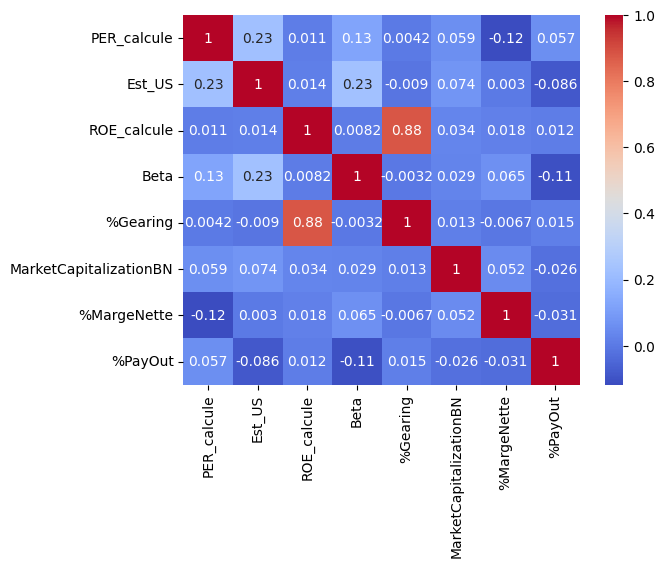

In [32]:
import seaborn as sns
sns.heatmap(matrice_corr, annot=True, cmap='coolwarm')

On remarque que le ROE_calcule et le Gearing sont fortement corrélés. On choisit de retirer le Gearing plutôt que le ROE qui est un indicateur de performance fondamental 

In [34]:
modele_formule_complet_final_2 = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              MarketCapitalizationBN + 
              Q("%MargeNette") + 
              Q("%PayOut")
"""

# Ajustement (fitting) du modèle sur le DataFrame nettoyé 'df_reg_final'
modele_complet_final_2 = smf.ols(formula=modele_formule_complet_final_2, data=df_reg_final).fit()

# Affichage des résultats
print("\n--- Résultat de la Régression Multiple ---")
print(modele_complet_final_2.summary())


--- Résultat de la Régression Multiple ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     39.85
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           1.09e-46
Time:                        11:23:40   Log-Likelihood:                -10137.
No. Observations:                2708   AIC:                         2.029e+04
Df Residuals:                    2701   BIC:                         2.033e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

On remarque que le R^2 reste identique, le coefficient lié à la marge nette est négatif ce qui est contre intuitif : une marge nette plus élevée devrait avoir un impact positif sur le PER.
On peut remplacer la capitalisation boursière par d'autres données de marché en utilisant le data frame Damodaran 

In [39]:
chemin_fichier = '../Collecte de données/country_risk_premiums.csv'
df_damodaran = pd.read_csv(chemin_fichier)
df_damodaran.head(20)   

,Country,Adj. Default Spread,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate,Moody's rating
0,Abu Dhabi,0.49,4.99,0.66,15.00,Aa2
1,Albania,3.56,9.13,4.80,15.00,Ba3
2,Algeria,2.98,8.35,4.02,15.00,NR
3,Andorra (Principality of),1.58,6.46,2.13,18.98,Baa1
4,Angola,6.44,13.01,8.68,25.00,B3
5,Anguilla,6.01,12.44,8.11,25.23,NR
6,Antigua & Barbuda,6.01,12.43,8.10,25.23,NR
7,Argentina,11.88,20.35,16.02,35.00,Ca
8,Armenia,3.56,9.13,4.80,18.00,Ba3
9,Aruba,2.18,7.26,2.93,25.00,Baa3


In [40]:
#Affichons tous les Pays du data frame Damodaran 
print("\nListe des pays dans le data frame Damodaran:")
print(df_damodaran['Country'].unique())


Liste des pays dans le data frame Damodaran:
['Abu Dhabi' 'Albania' 'Algeria' 'Andorra               (Principality of)'
 'Angola' 'Anguilla' 'Antigua &               Barbuda' 'Argentina'
 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bolivia' 'Bosnia and               Herzegovina' 'Botswana' 'Brazil'
 'British Virgin               Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Channel               Islands' 'Chile' 'China' 'Colombia'
 'Congo               (Democratic Republicof)'
 'Congo               (Republic of)' 'Cook Islands' 'Costa Rica' 'Croatia'
 'Cuba' 'Curaçao' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican               Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Ethiopia' 'Falkland               Islands' 'Fiji' 'Finland'
 'France' 'French Guiana' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar'

In [41]:
print(df_analyse['Country'].unique())

['United States' 'Bermuda' 'Ireland' 'Switzerland' 'United Kingdom'
 'Canada' 'Netherlands' 'Singapore' 'Germany' 'Italy' 'Sweden' 'Belgium'
 'France' 'Spain' 'Austria' 'Luxembourg' 'Poland' 'China' 'Finland'
 'Norway' 'Denmark' 'Mexico']


In [42]:
# Uniformisation des noms de pays dans les deux DataFrames

# On supprime les espaces invisibles et on remplace les doubles espaces par un seul 
df_reg_final['Country'] = df_reg_final['Country'].str.strip()
df_damodaran['Country'] = df_damodaran['Country'].str.strip()
df_reg_final['Country'] = df_reg_final['Country'].str.replace('\s+', ' ', regex=True)
df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True) 

# Rendre la colonne 'Country' l'index pour faciliter la jointure
df_damodaran.set_index('Country', inplace=True) 

# Sélection des colonnes pertinentes
colonnes_marche = ['Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate']
df_damodaran = df_damodaran[colonnes_marche]

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_15086/3097731726.py:6: SyntaxWarning: invalid escape sequence '\s'
  df_reg_final['Country'] = df_reg_final['Country'].str.replace('\s+', ' ', regex=True)
/tmp/ipykernel_15086/3097731726.py:7: SyntaxWarning: invalid escape sequence '\s'
  df_damodaran['Country'] = df_damodaran['Country'].str.replace('\s+', ' ', regex=True)


In [43]:
# Jointure et Nettoyage des NaN 

df_fusion = pd.merge(
    df_reg_final, 
    df_damodaran, 
    left_on='Country', 
    right_index=True, 
    how='left' 
)


print(f"\nDataFrame après jointure et nettoyage des pays non trouvés : {len(df_fusion)} observations.")




DataFrame après jointure et nettoyage des pays non trouvés : 2708 observations.


In [45]:
df_fusion.isna().sum()

Ticker                     0
YahooTicker                0
Nom                        0
Zone                       0
AnneeFiscale               0
DateRapport                0
Sector                     0
Industry                   0
Country                    0
Beta                       0
MarketCapitalizationBN     0
SharesOutstandingMn        0
PER_calcule                0
ROE_calcule                0
ROA_calcule                0
DebtToEquity_calcule       0
EPS                        0
EOD_Close_Price            0
NetIncomeBN                0
TotalRevenueBN             0
TotalEquityBN              0
TotalAssetsBN              0
TotalDebtBN                0
Dividendes_Annuels         0
Annual_Volume_Traded_BN    0
%MargeNette                0
%Gearing                   0
%PayOut                    0
Est_US                     0
Equity Risk Premium        0
Country Risk Premium       0
Corporate Tax Rate         0
dtype: int64

In [44]:
df_fusion.head()

,Ticker,YahooTicker,Nom,Zone,AnneeFiscale,DateRapport,Sector,Industry,Country,Beta,...,TotalDebtBN,Dividendes_Annuels,Annual_Volume_Traded_BN,%MargeNette,%Gearing,%PayOut,Est_US,Equity Risk Premium,Country Risk Premium,Corporate Tax Rate
0,A,A,A,USA,2021,2021-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.729,0.776,0.407757,19.148599,50.640193,19.497487,1,4.33,0.0,25.0
1,A,A,A,USA,2022,2022-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.769,1.065,0.427283,18.311916,52.196041,25.417661,1,4.33,0.0,25.0
2,A,A,A,USA,2023,2023-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,2.735,0.911,0.461257,18.147227,46.792130,21.587678,1,4.33,0.0,25.0
3,A,A,A,USA,2024,2024-10-31,Healthcare,Diagnostics & Research,United States,1.274,...,3.390,0.956,0.431039,19.800307,57.477111,21.531532,1,4.33,0.0,25.0
4,AAPL,AAPL,AAPL,USA,2022,2022-09-30,Technology,Consumer Electronics,United States,1.107,...,132.480,0.910,22.065504,25.309641,261.446164,14.796748,1,4.33,0.0,25.0


In [46]:
# Lancement de la Régression Macro-Financière 

import statsmodels.formula.api as smf

modele_formule_macro = """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium") + 
              Q("Corporate Tax Rate")+
              Q("Equity Risk Premium")
"""

modele_macro = smf.ols(formula=modele_formule_macro, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     38.21
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           2.06e-51
Time:                        11:32:21   Log-Likelihood:                -10124.
No. Observations:                2708   AIC:                         2.026e+04
Df Residuals:                    2700   BIC:                         2.031e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

On a encore un problème de multicolinéarité et le R^2 reste faible. On remarque encore une incohérence liée à l'impact négatif de la marge nette sur le PER. Toutefois on remarque 

In [47]:
#Testons la multicolinéarité des variables utilisées dans le modèle 
# Sélection des variables explicatives
colonnes_reg = [
    'Est_US', 
    'ROE_calcule', 
    'Beta', 
    '%MargeNette',
    '%PayOut',
    'Country Risk Premium',
    'Corporate Tax Rate',
    'Equity Risk Premium'
]
# Calcul de la matrice de corrélation
matrice_corr_2 = df_fusion[colonnes_reg].corr()
print(matrice_corr_2)


                        Est_US  ROE_calcule      Beta  %MargeNette   %PayOut  \
Est_US                1.000000     0.013532  0.229388     0.002991 -0.086266   
ROE_calcule           0.013532     1.000000  0.008171     0.017555  0.011514   
Beta                  0.229388     0.008171  1.000000     0.065223 -0.106353   
%MargeNette           0.002991     0.017555  0.065223     1.000000 -0.030799   
%PayOut              -0.086266     0.011514 -0.106353    -0.030799  1.000000   
Country Risk Premium -0.446449    -0.009623 -0.144816     0.020562  0.040756   
Corporate Tax Rate    0.168832    -0.003629  0.096899    -0.020462 -0.042233   
Equity Risk Premium  -0.446449    -0.009623 -0.144816     0.020562  0.040756   

                      Country Risk Premium  Corporate Tax Rate  \
Est_US                           -0.446449            0.168832   
ROE_calcule                      -0.009623           -0.003629   
Beta                             -0.144816            0.096899   
%MargeNette    

<Axes: >

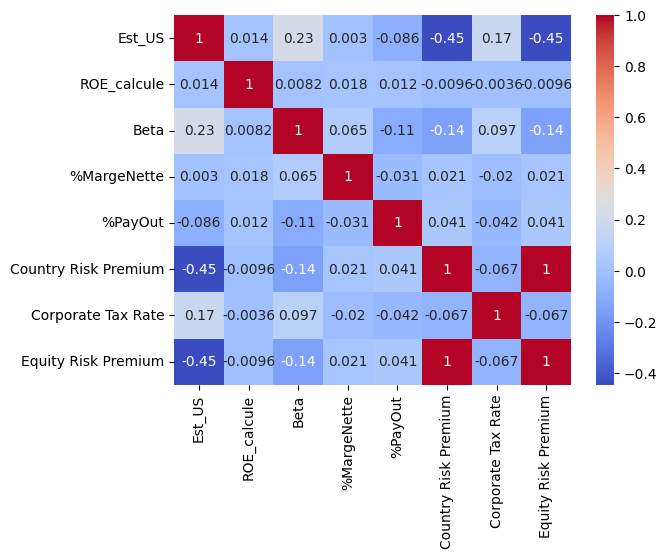

In [48]:
sns.heatmap(matrice_corr_2, annot=True, cmap='coolwarm')

On remarque une forte corrélation entre Country Risk Premium, Equity Risk Premium et Corporate Tax. On peut encore ajouter la variable annual volume traded 

In [49]:
print(df_fusion.columns)

Index(['Ticker', 'YahooTicker', 'Nom', 'Zone', 'AnneeFiscale', 'DateRapport',
       'Sector', 'Industry', 'Country', 'Beta', 'MarketCapitalizationBN',
       'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule',
       'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
       'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
       'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
       '%Gearing', '%PayOut', 'Est_US', 'Equity Risk Premium',
       'Country Risk Premium', 'Corporate Tax Rate'],
      dtype='object')


Afin de choisir les variables de la régressions on va regarder la matrice de covariance entre toutes les variables du data frame 

In [52]:
#On étudie la corrélation entre toutes les variables
colonnes_reg_exp = [
    'AnneeFiscale', 'Beta', 'MarketCapitalizationBN',
    'SharesOutstandingMn', 'PER_calcule', 'ROE_calcule', 'ROA_calcule',
    'DebtToEquity_calcule', 'EPS', 'EOD_Close_Price', 'NetIncomeBN',
    'TotalRevenueBN', 'TotalEquityBN', 'TotalAssetsBN', 'TotalDebtBN',
    'Dividendes_Annuels', 'Annual_Volume_Traded_BN', '%MargeNette',
    '%Gearing', '%PayOut', 'Est_US', 
    'Equity Risk Premium', 'Country Risk Premium', 'Corporate Tax Rate'
]

matrice_corr_cols = df_fusion[colonnes_reg_exp].corr()


<Axes: >

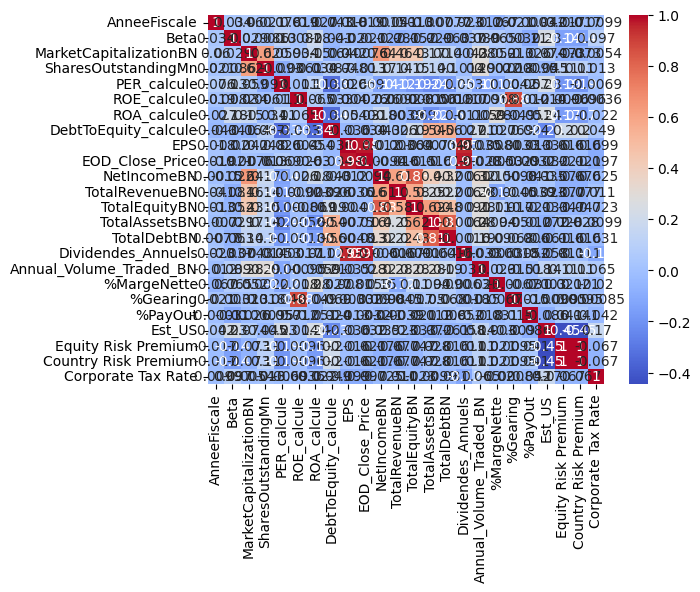

In [53]:
sns.heatmap(matrice_corr_cols, annot=True, cmap='coolwarm')

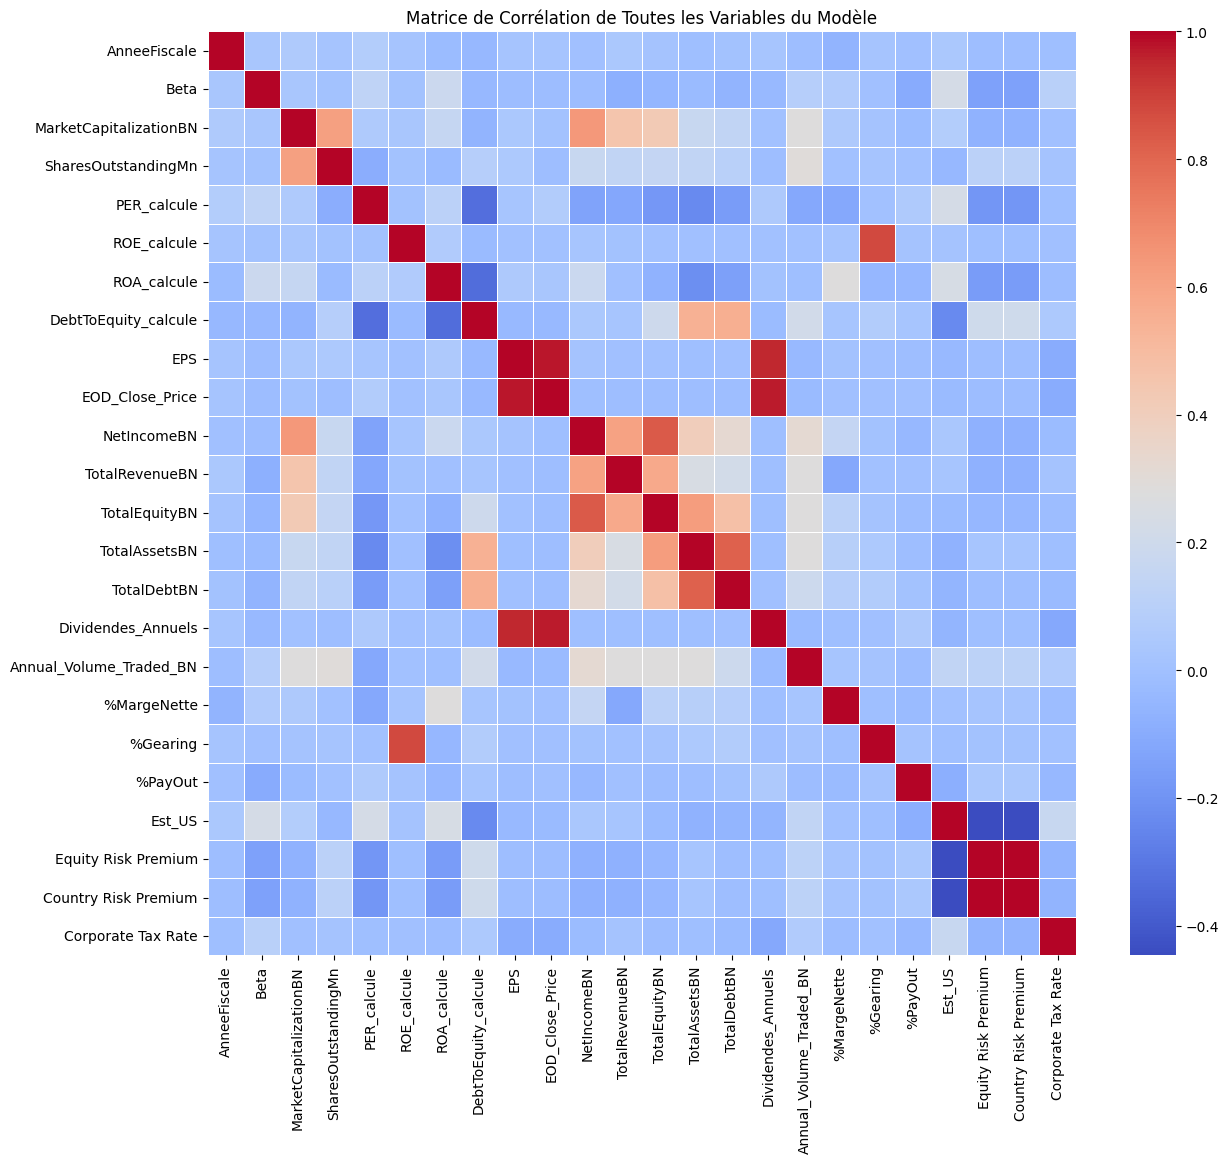

In [54]:

plt.figure(figsize=(14, 12)) 
sns.heatmap(
    matrice_corr_cols, 
    annot=False,  # Réglez sur True si vous voulez les nombres, mais False rend le graphique plus clair
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5
)
plt.title('Matrice de Corrélation de Toutes les Variables du Modèle')
plt.show()

In [ ]:

# --- Lancement de la seconde Régression Macro-Financière ---

import statsmodels.formula.api as smf

# On ajuste la formule à l'aide des observations concernant la multicolinéarité 
modele_formule_macro_3= """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium")+
              Annual_Volume_Traded_BN +
              MarketCapitalizationBN
"""

modele_macro_3 = smf.ols(formula=modele_formule_macro_3, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro_3.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     25.26
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           9.01e-33
Time:                        17:25:30   Log-Likelihood:                -5569.3
No. Observations:                1501   AIC:                         1.115e+04
Df Residuals:                    1493   BIC:                         1.120e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:

# --- Lancement de la seconde Régression Macro-Financière ---

import statsmodels.formula.api as smf

# On ajuste la formule à l'aide des observations concernant la multicolinéarité 
modele_formule_macro_3= """
PER_calcule ~ Est_US + 
              ROE_calcule + 
              Beta + 
              Q("%MargeNette") + 
              Q("%PayOut") + 
              Q("Country Risk Premium")+
              Annual_Volume_Traded_BN +
              MarketCapitalizationBN + 
              NetIncomeBN +
              TotalRevenueBN + 
              TotalEquityBN + 
              TotalAssetsBN + 
              TotalDebtBN + 
              EPS
"""

modele_macro_3 = smf.ols(formula=modele_formule_macro_3, data=df_fusion).fit()

print("\n--- Résultat de la Régression (Modèle Macro-Financier) ---")
print(modele_macro_3.summary())


--- Résultat de la Régression (Modèle Macro-Financier) ---
                            OLS Regression Results                            
Dep. Variable:            PER_calcule   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     28.88
Date:                Sun, 14 Dec 2025   Prob (F-statistic):           6.84e-64
Time:                        17:30:24   Log-Likelihood:                -5484.3
No. Observations:                1501   AIC:                         1.100e+04
Df Residuals:                    1487   BIC:                         1.107e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------